In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci
from io import StringIO

In [24]:
def poly(r ,a0,a1,a2,a3,a4,a5):
    return a0 + a1 * r + a2 * r**2 + a3 * r**3 + a4 * r**4 + a5 * r**5 
fitparam = [1258.5376423872738, -3150.1699751047763, 3155.0331767760663, -1576.5297416780966, 392.9036254233017, -39.07820667200043]
def tempfunc(r):
    return np.power(10, poly(r, *fitparam))

In [25]:
df = pd.read_csv('C:/Users/vasob/OneDrive/Documents/GitHub/fp/FP/F03/parameter_list.dat', sep="\s+", skiprows=2, names=['Zeit', 'T_2.Stufe', 'Err1', 'T_Basis', 'Err2', 'R_Basis',	'Err3',	'Heizleistung',	'Err4',	'Messzeit',	'U_Agilent', 'U_Oszi',	'Err5',	't_Agilent', 'Pulsenergie',	'Err6',	'Anzahl',	'I_Thermometer',	't_max (Th_1)',	'Err7',	't_max (Th_2)',	'Err8'])

df

,Zeit,T_2.Stufe,Err1,T_Basis,Err2,R_Basis,Err3,Heizleistung,Err4,Messzeit,...,Err5,t_Agilent,Pulsenergie,Err6,Anzahl,I_Thermometer,t_max (Th_1),Err7,t_max (Th_2),Err8
0,10:54,35.000,0.007,30.065,0.005,3.833,0.001,12.65,--,2.000,...,0.040,0.010,--,--,10.0,0.15,NaN,NaN,NaN,NaN
1,11:17,40.000,0.004,36.227,0.005,5.204,0.001,13.25,--,2.000,...,0.040,0.012,10,0.15,NaN,NaN,NaN,NaN,NaN,NaN
2,12:00,50.000,0.005,47.965,0.006,8.569,0.002,14.10,3,6.667,...,0.020,10.000,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12:43,60.000,0.002,58.743,0.005,12.480,0.003,14.65,3.8,6.667,...,0.035,10.000,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13:32,69.998,0.006,68.880,0.002,16.648,0.002,15.05,5,6.667,...,0.050,10.000,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14:25,80.000,0.002,78.929,0.002,20.913,0.001,15.40,6,6.667,...,0.050,10.000,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15:20,100.000,0.001,98.918,0.002,29.479,0.001,16.35,12,6.667,...,0.072,10.000,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16:30,200.000,0.001,198.891,0.002,70.577,0.002,20.20,120,6.667,...,0.350,5.000,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17:25,295.000,0.005,293.330,0.007,107.850,0.003,27.10,180,6.667,...,0.800,5.000,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dQ = df.t_Agilent * df.Heizleistung
dQ

0      0.1265
1      0.1590
2    141.0000
3    146.5000
4    150.5000
5    154.0000
6    163.5000
7    101.0000
8    135.5000
dtype: float64

In [27]:
Q = {35:dQ[0], 40:dQ[1], 50:dQ[2], 60:dQ[3], 70:dQ[4], 80:dQ[5], 100:dQ[6], 200:dQ[7], 300:dQ[8]}
#Q = {35:0.062129924, 40:0.054914, 50:0.0564976, 60:0.066787, 70:0.070355598, 80:0.0560072, 100:0.05721, 200:0.11236, 300:0.16525}
qtemp = 35
#print(Q[300])
T0 = 0
ra = 0.15
p = 3.99
x0 = 1.1
def fit(t, c, D): #t ist die zeit vergangen nach dem puls
    return T0 + (Q[qtemp]/(np.pi * ra**2 * p * c * np.sqrt(np.pi * D * t)))*np.exp((-1*x0**2)/(4*D*t))

In [28]:
temp_lit = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200, 250, 273.2, 300]

c_lit = [8.3680000e-03, 8.3680000e-02, 2.9288000e-01, 7.5312000e-01, 1.3932720e+00,
         2.5815280e+00, 4.3095200e+00, 6.7780800e+00, 1.0200592e+01, 1.4631448e+01,
         2.7254576e+01, 4.4936160e+01, 6.7613440e+01, 9.5060480e+01, 1.2593840e+02,
         3.1363264e+02, 5.0166160e+02, 6.5730640e+02, 7.1755600e+02, 7.7864240e+02] #in J/kg*K

c_lit = np.multiply(c_lit, 1000) # in J/g*K

D_lit = [1.23727717e+01, 8.75147266e+00, 7.50126228e+00, 5.26429582e+00,
         3.66117320e+00, 2.02487547e+00, 1.03716817e+00, 4.47073955e-01,
         1.90620745e-01, 8.97471879e-02, 2.45533785e-02, 8.59805636e-03,
         3.58544459e-03, 1.70014039e-03, 9.02317035e-04, 1.20774381e-04,
         4.12769698e-05, 2.22825529e-05, 1.83000534e-05, 1.49184807e-05] # in m^2/s

D_lit = np.multiply(D_lit, 10000) # in cm^2/s # 10000

print(c_lit[14])
print(D_lit[14])


125938.4
9.02317035


14
[125938.4, 9.02317035]
[1795.537508756357, 1.5166348447892535]


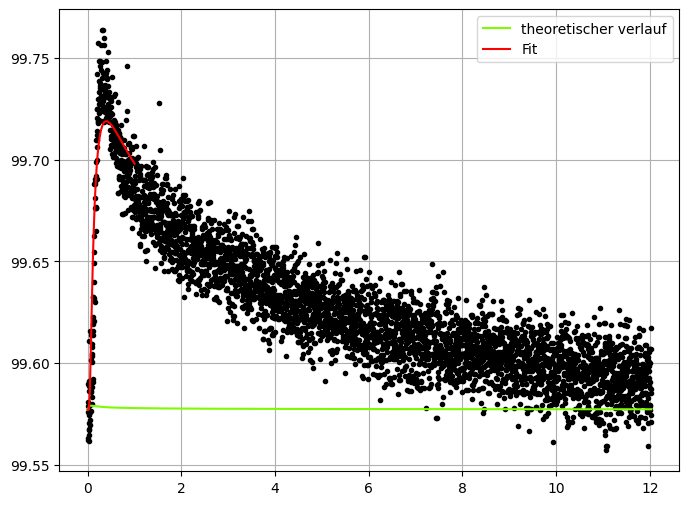

In [29]:


temps = {35:34.88392531, 40:40.28873543, 50:49.89424963, 60:59.47382722, 70:70.41760181, 80:80.40659227, 100:99.5769431, 200:200.06943181, 300:294.9793038}
i = 100
for temp in [i]:
    if temp < 200:
        numbs = np.arange(1,11)
    else:
        numbs = np.arange(1,6)
    t = []
    r = []

    for g in numbs:
        data = pd.read_csv("C:/Users/vasob/OneDrive/Documents/GitHub/fp/FP/F03/"+ str(temp) + "K/" + str(temp) + "K_" + str(g) + ".dat", delim_whitespace=True, skiprows=4)
        data = data.values.tolist()
        for dat in data:
            if dat[0] > 0:
                t.append(dat[0])
                r.append(dat[1])
    df = pd.DataFrame(np.asarray(t), columns=['t'])
    df['r'] = np.log10(r)
    df['T'] = tempfunc(df.r)
    df = df.sort_values(by=['t'])
    #print(df)
    T0 = temps[temp]
    qtemp = temp
    #print(Q[300])

    for n in range(20):
        if temp_lit[n] == i:
            index = n
            print(index)
            print([c_lit[index], D_lit[index]])

    mask = (df.t >= 0) & (df.t < 1)
    popt, curv = sci.curve_fit(fit, df.t[mask], df['T'][mask])
    print(popt.tolist())

    plt.figure(figsize = (8,6))
    plt.grid()
    plt.plot(df.t, df['T'], linestyle = "", marker = ".", c = 'black')
    plt.plot(df.t, fit(df.t, c_lit[index], D_lit[index]), linestyle = '-', marker = '', c = 'lawngreen', label = 'theoretischer verlauf')
    plt.plot(df.t[mask], fit(df.t, *popt)[mask], linestyle = "-", marker = "", c = 'red', label = 'Fit')
    #plt.xlim(0, 1.2)
    #plt.ylim(34.8, 35.6)
    plt.legend(loc = 'upper right')
    plt.show()

    #plt.savefig('T-t-Verlauf_' + str(i) + '_K.pdf', bbox_inches = 'tight')

In [30]:
r = [188.18743846153845, 175.87946028169014, 157.2471215500945, 142.61421275964392, 129.68592652370202, 120.3824673585325, 106.74970116550116, 68.81719490787269, 53.11385439388295]
r = np.log10(r)
print(tempfunc(r))

[ 34.88392531  40.28873543  49.89424963  59.47382722  70.41760181
  80.40659227  99.57694316 200.06943181 294.9793038 ]
